In [1]:
from pycaret import classification as clf, utils

In [2]:
import data

In [3]:
train = data.train

In [8]:
config = clf.setup(
    data=train,
    target="Survived",
    ignore_features=["PassengerId", "Name", "Ticket", "Cabin"],
    numeric_features=["Pclass", "SibSp", "Parch"],
    normalize=True,
    normalize_method="minmax",
    session_id=210622,
)

,Description,Value
0,session_id,210622
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(712, 12)"
5,Missing Values,True
6,Numeric Features,5
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
comparison = clf.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8251,0.8604,0.7146,0.8109,0.7556,0.6208,0.6273,0.3930
rf,Random Forest Classifier,0.8050,0.8458,0.7143,0.7662,0.7347,0.5816,0.5867,0.0510
xgboost,Extreme Gradient Boosting,0.8008,0.8444,0.7196,0.7641,0.7331,0.5755,0.5831,0.2850
catboost,CatBoost Classifier,0.7989,0.8514,0.6404,0.8025,0.7064,0.5570,0.5698,0.1850
gbc,Gradient Boosting Classifier,0.7951,0.8456,0.6725,0.7659,0.7116,0.5544,0.5610,0.0170
lr,Logistic Regression,0.7949,0.8387,0.6877,0.7589,0.7161,0.5569,0.5630,0.2370
lda,Linear Discriminant Analysis,0.7909,0.8367,0.6933,0.7448,0.7131,0.5499,0.5550,0.0030
et,Extra Trees Classifier,0.7870,0.8339,0.7304,0.7203,0.7224,0.5502,0.5530,0.0460
ridge,Ridge Classifier,0.7869,0.0000,0.6827,0.7425,0.7063,0.5405,0.5458,0.0030
knn,K Neighbors Classifier,0.7771,0.8287,0.6409,0.7437,0.6825,0.5134,0.5219,0.0060


In [11]:
lgbm = clf.create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8000,0.8642,0.7368,0.7368,0.7368,0.5756,0.5756
1,0.8800,0.8981,0.7895,0.8824,0.8333,0.7400,0.7428
2,0.8000,0.7946,0.6316,0.8000,0.7059,0.5575,0.5665
3,0.8400,0.9160,0.7895,0.7895,0.7895,0.6604,0.6604
4,0.8200,0.8166,0.5789,0.9167,0.7097,0.5887,0.6213
5,0.8800,0.9491,0.7895,0.8824,0.8333,0.7400,0.7428
6,0.8400,0.8710,0.6842,0.8667,0.7647,0.6460,0.6564
7,0.8200,0.8404,0.6842,0.8125,0.7429,0.6060,0.6113
8,0.7959,0.8423,0.7778,0.7000,0.7368,0.5709,0.5730
9,0.7755,0.8123,0.6842,0.7222,0.7027,0.5226,0.5231


In [13]:
lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=210622, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [15]:
tuned_lgbm = clf.tune_model(
    lgbm,
    custom_grid={
        "n_estimators": [50, 100, 200, 500],
        "max_depth": list(range(3, 10)),
    }
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8600,0.8667,0.7368,0.8750,0.8000,0.6935,0.6996
1,0.8600,0.9032,0.7895,0.8333,0.8108,0.6998,0.7005
2,0.7600,0.8081,0.5263,0.7692,0.6250,0.4575,0.4753
3,0.8200,0.9075,0.7368,0.7778,0.7568,0.6141,0.6146
4,0.8000,0.7470,0.5789,0.8462,0.6875,0.5479,0.5693
5,0.8800,0.9576,0.7895,0.8824,0.8333,0.7400,0.7428
6,0.8200,0.8531,0.6316,0.8571,0.7273,0.5975,0.6130
7,0.8000,0.8132,0.5789,0.8462,0.6875,0.5479,0.5693
8,0.7959,0.8656,0.7778,0.7000,0.7368,0.5709,0.5730
9,0.7551,0.7851,0.6316,0.7059,0.6667,0.4741,0.4759


In [17]:
lr = clf.create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7800,0.8438,0.6842,0.7222,0.7027,0.5283,0.5288
1,0.8600,0.9083,0.8421,0.8000,0.8205,0.7059,0.7065
2,0.8000,0.7521,0.5263,0.9091,0.6667,0.5379,0.5789
3,0.8000,0.9168,0.7895,0.7143,0.7500,0.5840,0.5861
4,0.7200,0.8353,0.6316,0.6316,0.6316,0.4058,0.4058
5,0.8400,0.8183,0.6842,0.8667,0.7647,0.6460,0.6564
6,0.9000,0.9100,0.8421,0.8889,0.8649,0.7856,0.7863
7,0.8000,0.7980,0.6842,0.7647,0.7222,0.5667,0.5689
8,0.7551,0.8620,0.6667,0.6667,0.6667,0.4731,0.4731
9,0.6939,0.7421,0.5263,0.6250,0.5714,0.3360,0.3390


In [19]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=210622, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
lr_tuned = clf.tune_model(lr, custom_grid={"C": [100, 50.0, 20.0, 10.0, 5.0, 3.0, 2.0, 1.0]})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7800,0.8540,0.6842,0.7222,0.7027,0.5283,0.5288
1,0.8800,0.9066,0.8421,0.8421,0.8421,0.7453,0.7453
2,0.8000,0.7504,0.5263,0.9091,0.6667,0.5379,0.5789
3,0.8000,0.8981,0.7895,0.7143,0.7500,0.5840,0.5861
4,0.7600,0.8268,0.6316,0.7059,0.6667,0.4801,0.4819
5,0.8600,0.8251,0.7368,0.8750,0.8000,0.6935,0.6996
6,0.9000,0.9134,0.8421,0.8889,0.8649,0.7856,0.7863
7,0.8000,0.7980,0.6842,0.7647,0.7222,0.5667,0.5689
8,0.7551,0.8441,0.6667,0.6667,0.6667,0.4731,0.4731
9,0.6939,0.7386,0.5263,0.6250,0.5714,0.3360,0.3390


In [26]:
lr_tuned

LogisticRegression(C=20.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=210622, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

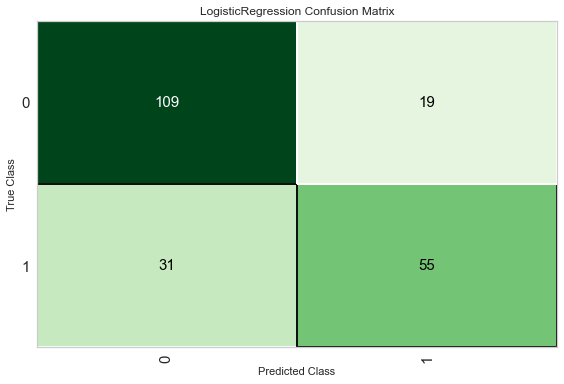

In [27]:
clf.plot_model(lr_tuned, plot="confusion_matrix")